In [1]:
import time
import glob
import numpy as np
import pandas as pd
import scikitplot as skplot
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
tf.__version__

'2.4.1'

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Importing the database

In [4]:
file = glob.iglob('*.csv')
dataset = pd.read_csv(*file)
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
print(f'The length of the Dataset is - {len(dataset)}')

The length of the Dataset is - 10000


# Splitting the dataset into Independent and Dependent variable

In [6]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [7]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [8]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

# Label - Encoding the Male/Female

In [9]:
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


# OneHotEncoding the Country Name

In [10]:
ct = ColumnTransformer(transformers=[('encoder', 
                                      OneHotEncoder(), 
                                      [1])], 
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [11]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


# Splitting The dataset into Training and Test Set

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
print(f"The Dimenstion of X_train - {X_train.shape}")
print(f"The Dimenstion of X_test - {X_test.shape}")
print(f"The Dimenstion of Y_train - {Y_train.shape}")
print(f"The Dimenstion of Y_test - {Y_test.shape}")

The Dimenstion of X_train - (8000, 12)
The Dimenstion of X_test - (2000, 12)
The Dimenstion of Y_train - (8000,)
The Dimenstion of Y_test - (2000,)


# Feature Scaling the Dataset

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("Training Set\n",X_train)
print("-------------------")
print("Testing Set\n",X_test)

Training Set
 [[-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   1.10643166]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -0.74866447]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.41231994]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
   0.84432121]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   0.32472465]]
-------------------
Testing Set
 [[-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
   1.61085707]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   0.49587037]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
  -0.42478674]
 ...
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   0.71888467]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -1.54507805]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1

## Building the ANN
# Steps
1. Initializing the ANN
2. Adding Input Layer and the first hidden Layer
3. Adding the Second hidder Layer
4. Adding the output Layer

In [14]:
#1
ann = tf.keras.models.Sequential()
#2 - Shallow Neural Network (If only one hidden layer)
ann.add(tf.keras.layers.Dense(units = 6, 
                              activation = 'relu'))
#3.
ann.add(tf.keras.layers.Dense(units = 6, 
                              activation = 'relu'))
#4.
ann.add(tf.keras.layers.Dense(units = 1, 
                              activation = 'sigmoid'))

# Compiling the ANN
1. optimizer
2. loss function
3. metrics

In [15]:
# For non binary classification
# We need to enter categorical_crossentropy and softmax activation function
ann.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy']
           )

# Training the ANN

In [16]:
start = time.time()
ann.fit(X_train, Y_train, 
        batch_size = 32, 
        epochs = 100
       )
end = time.time()
print(f"Total Time Taken - {end-start}")

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.7352 - accuracy: 0.4822
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.8007
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.8109
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8276
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8299
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3929 - accuracy: 0.8357
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8439
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8482: 0s - loss: 0.3560 - 
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3665 - accuracy: 0.8491
Epoch 10/100
250/250 [==============================] - 0s 2ms/step -

250/250 [==============================] - 0s 836us/step - loss: 0.3231 - accuracy: 0.8722
Epoch 79/100
250/250 [==============================] - 0s 815us/step - loss: 0.3155 - accuracy: 0.8744
Epoch 80/100
250/250 [==============================] - 0s 824us/step - loss: 0.3403 - accuracy: 0.8588
Epoch 81/100
250/250 [==============================] - 0s 834us/step - loss: 0.3331 - accuracy: 0.8629
Epoch 82/100
250/250 [==============================] - 0s 815us/step - loss: 0.3267 - accuracy: 0.8666
Epoch 83/100
250/250 [==============================] - 0s 865us/step - loss: 0.3308 - accuracy: 0.8626
Epoch 84/100
250/250 [==============================] - 0s 826us/step - loss: 0.3141 - accuracy: 0.8711
Epoch 85/100
250/250 [==============================] - 0s 840us/step - loss: 0.3309 - accuracy: 0.8667
Epoch 86/100
250/250 [==============================] - ETA: 0s - loss: 0.3232 - accuracy: 0.86 - 0s 1ms/step - loss: 0.3237 - accuracy: 0.8672
Epoch 87/100
250/250 [===============

In [17]:
print(ann.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (32, 6)                   78        
_________________________________________________________________
dense_1 (Dense)              (32, 6)                   42        
_________________________________________________________________
dense_2 (Dense)              (32, 1)                   7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
None


## Predicting the Results

In [18]:
res = ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5
if res == False: 
    print("Not Gonna Leave")
else:
    print("Gonna Leave")

Not Gonna Leave


# Vector of Predictions

In [19]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred), 
                                     1), 
                      Y_test.reshape(len(Y_test), 1)
                     ), 1)
     )

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Confusion Matrix

In [20]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[1525   70]
 [ 209  196]]


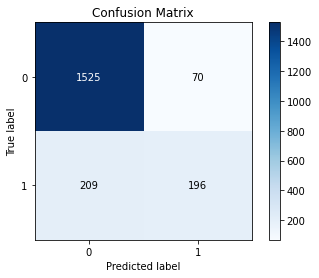

In [21]:
skplot.metrics.plot_confusion_matrix(Y_test, y_pred)
plt.show()

In [22]:
print(f"The accuracy of the Model is - {accuracy_score(Y_test, y_pred)*100}%")

The accuracy of the Model is - 86.05000000000001%
